# Predicting Fire Area Damage

For this assignment, we will be using linear regresion to forecase fire area damage. We will leverage the [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) to solve this problem. Additional information regarding this work can be found [Cortez and Morais, 2007](http://www3.dsi.uminho.pt/pcortez/fires.pdf).

Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

# Learning Objectives
- Produce a linear regression model with a statistically significant improvement over the null model (a model without input variables).
- Identify problems associated with the presence of outliers and collinear variables.
- Produce a regression model with interaction terms with a statistically significant improvement over a model without interaction terms.

In [3]:
import pandas as pd

forestfires = pd.read_csv('forestfires.csv')
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Question 1.1: Using the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method, provide the summary statistics of the data

In [4]:
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Question 1.2: Apply log(area+1) to the data

In [5]:
import numpy as np

forestfires['area'] = np.log10(forestfires['area'] + 1)

Question 2.1: Visually explore the data using pairplot.

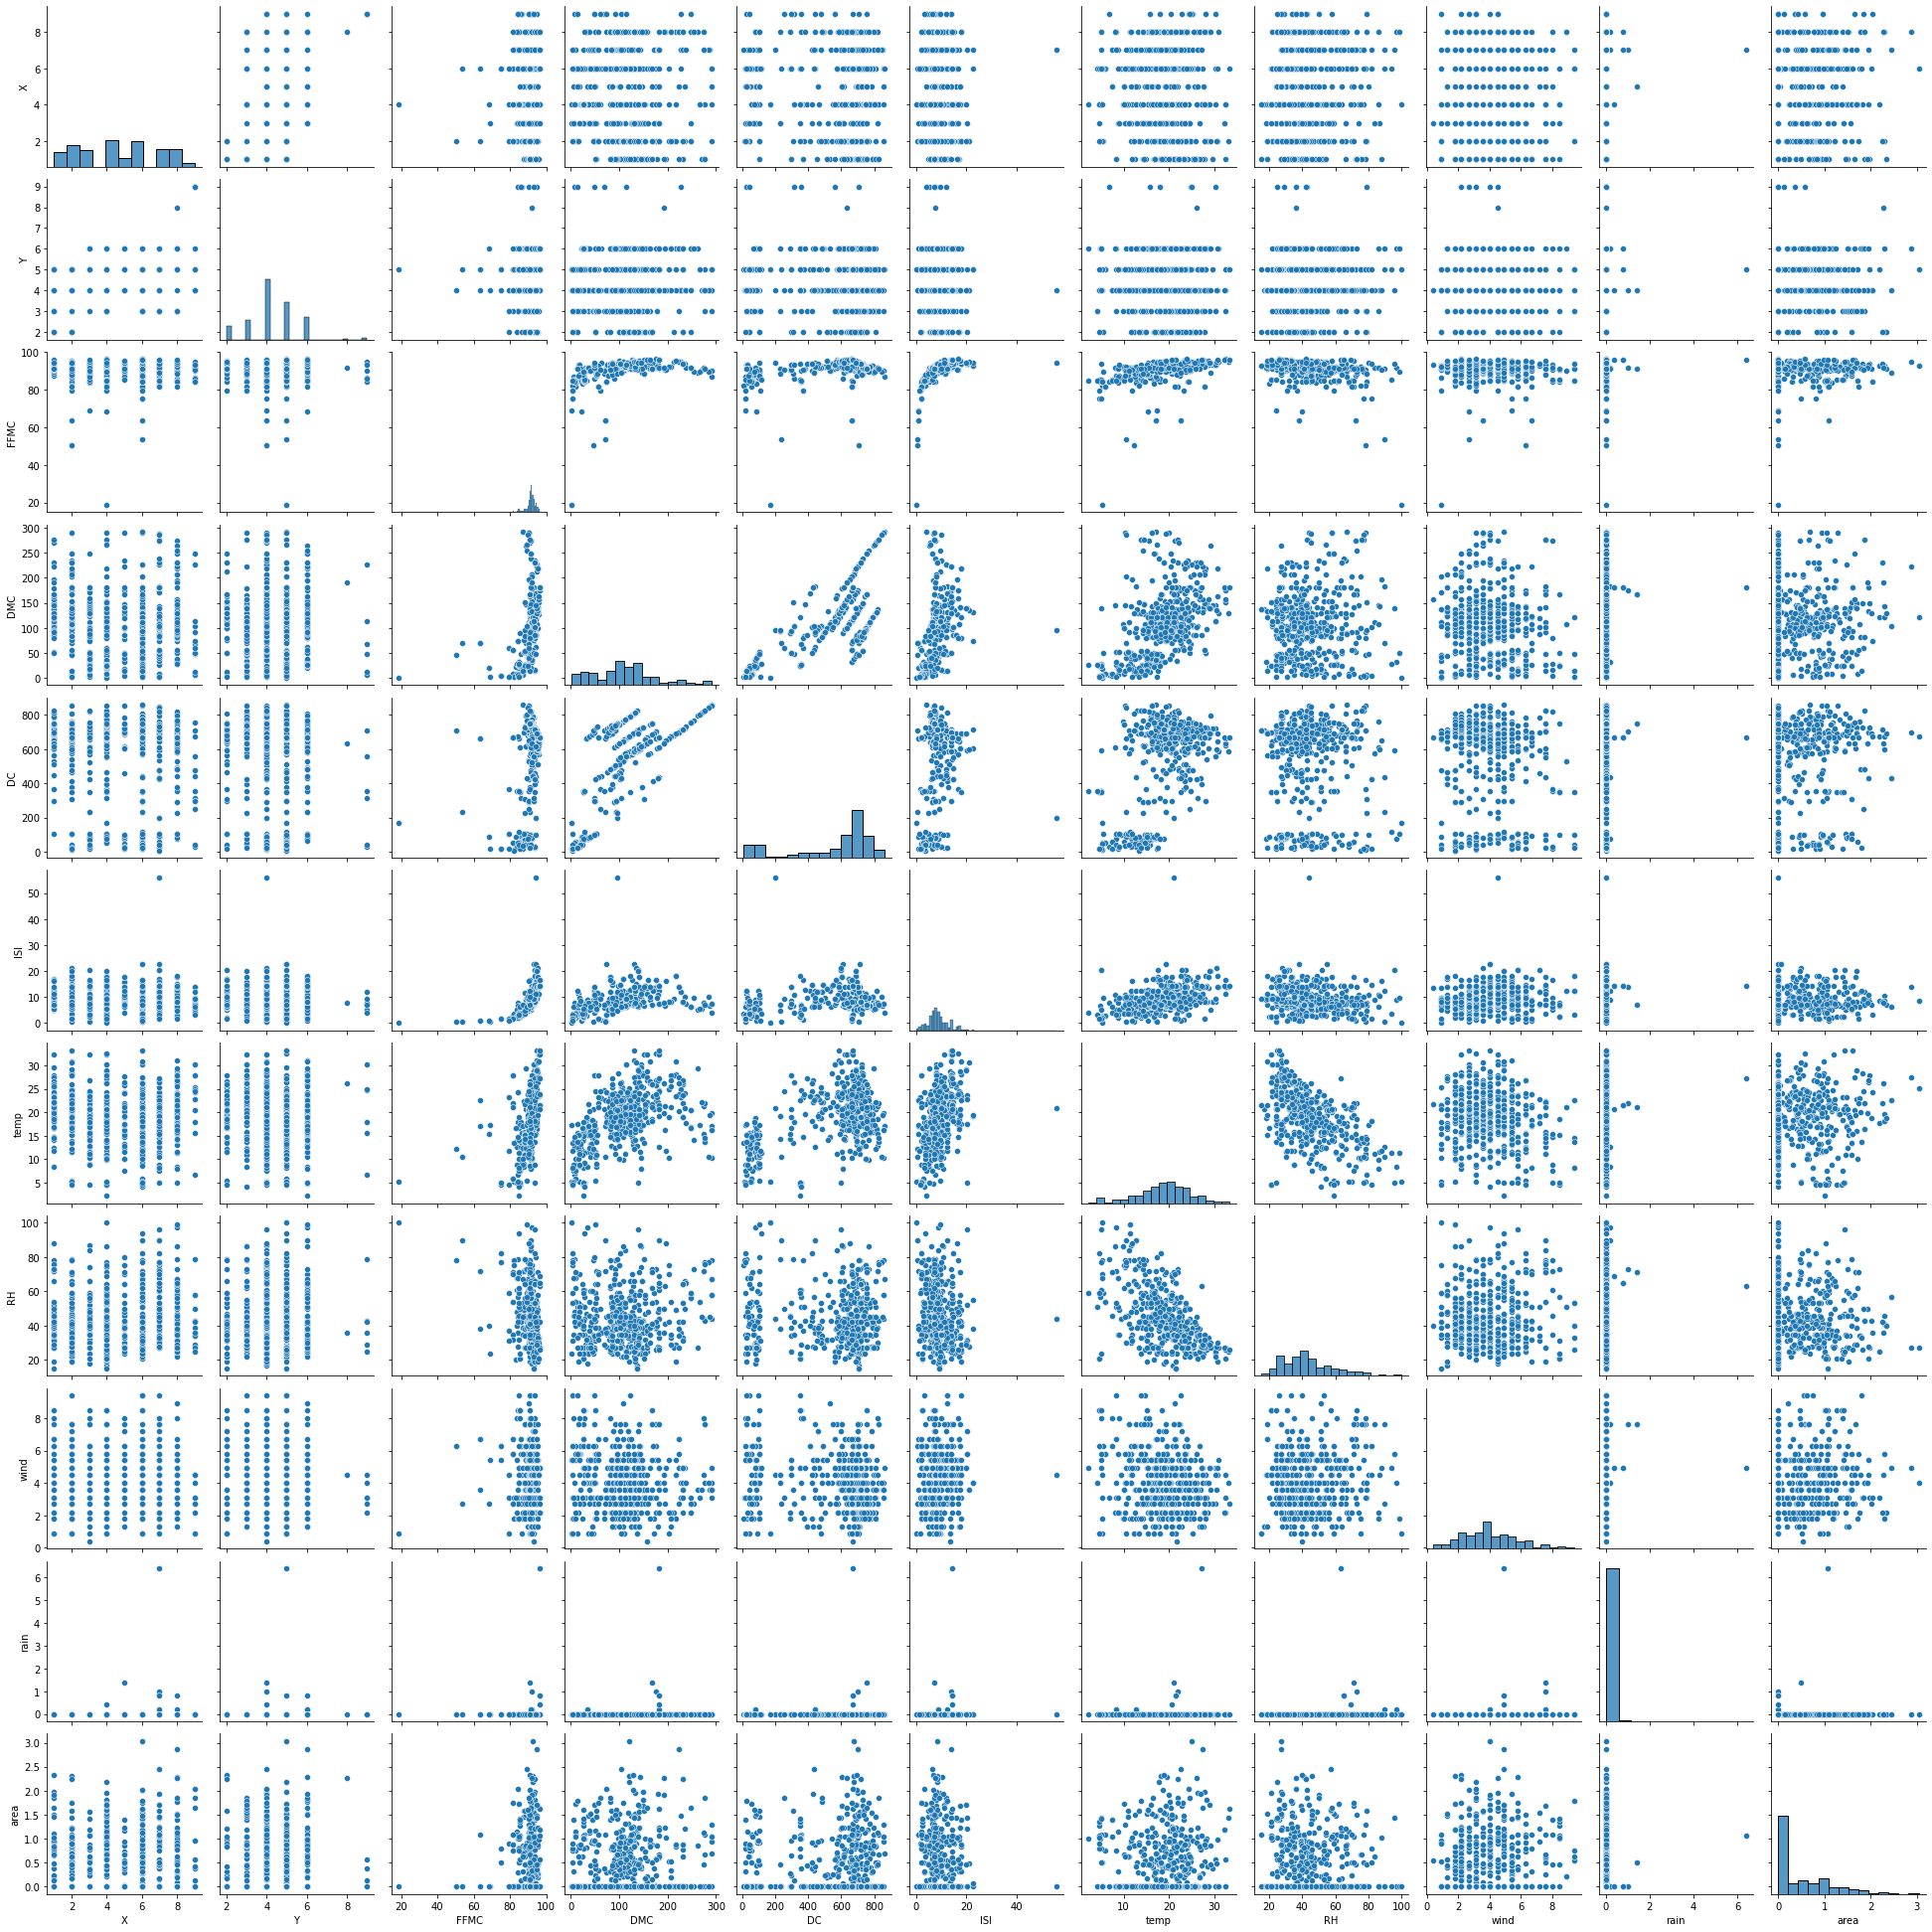

In [6]:
import seaborn as sns

sns.pairplot(forestfires)

Question 2.2: Zoom in at the rain vs area by plotting the scatter plot. What do you conclude?

<AxesSubplot:xlabel='rain', ylabel='area'>

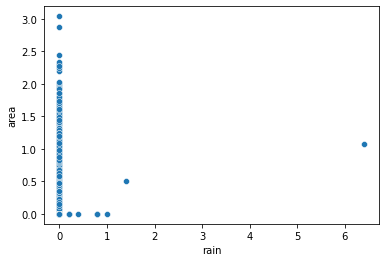

In [7]:
sns.scatterplot(data=forestfires, x='rain', y='area')

There isn't many instances where it rains during the fire, but when it does, it limits the area spread given that we remove the two outlier points where rain is greater than 1mm

Question 4.1: Develop a simple linear regression model, relating area with rain and wind only. Calculate the predict values based on test data.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X=forestfires[['rain','wind']]
y=forestfires['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Linear regression model:

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Question 4.2: Calculate the mean squared error of predict results.

In [9]:
print(mean_squared_error(y_test, y_pred))

0.39262079250251286


Question 5.1: Develop a linear regression model, relating area with all features. Calculate the predict values based on test data.

In [37]:
X=forestfires[['X','Y','FFMC','DMC','DC','ISI','temp','RH','rain','wind']]
y=forestfires['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# Linear regression model:

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Question 5.2: Calculate the mean squared error of predict results.

In [38]:
print(mean_squared_error(y_test, y_pred))

0.39542522475269126


Question 6.1: Using the [polynomialfeature](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) , perfrom linear regression with interaction between features

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

polyreg=make_pipeline(PolynomialFeatures(interaction_only=True,include_bias = False),LinearRegression())
polyreg.fit(X_train,y_train)


y_pred = polyreg.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.49039238209325203
